<a href="https://colab.research.google.com/github/Indukurivigneshvarma/Deep_Learning/blob/main/Time_Series/STL_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip().str.capitalize()

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Temp'].interpolate(inplace=True)

/tmp/ipython-input-708664866.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temp'].interpolate(inplace=True)


In [4]:
stl = STL(df['Temp'], period=365, robust=True)
result = stl.fit()

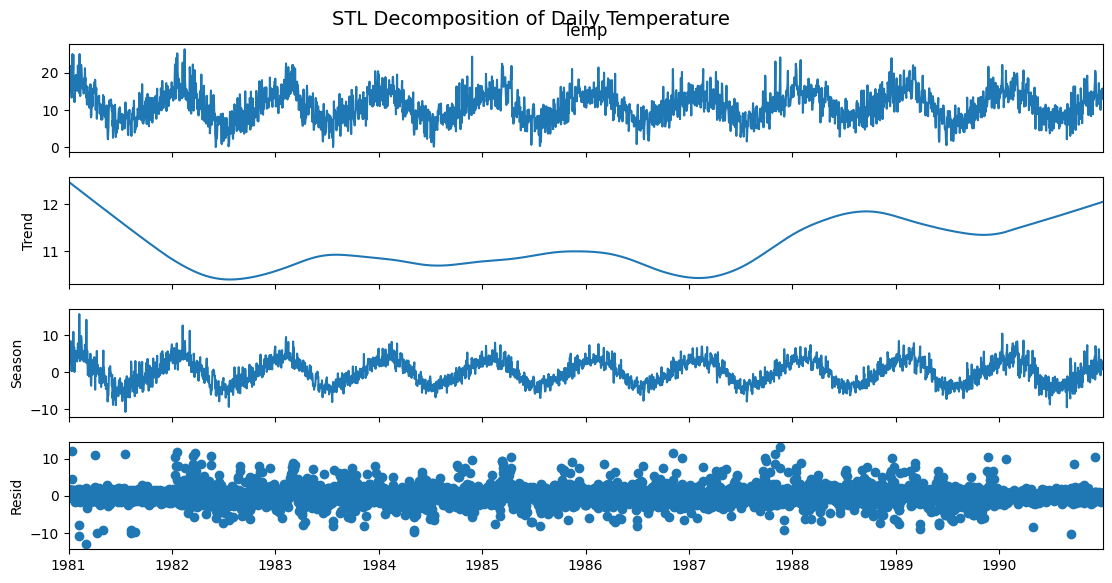

In [5]:
fig = result.plot()
fig.set_size_inches(12, 6)
plt.suptitle("STL Decomposition of Daily Temperature", fontsize=14)
plt.show()


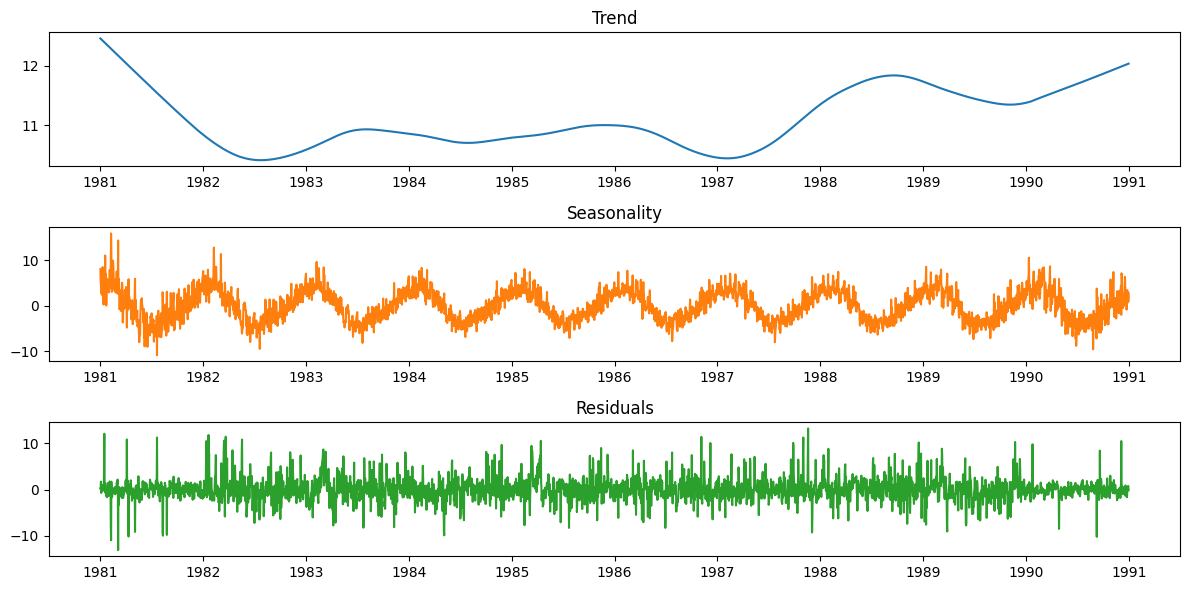

In [6]:
trend = result.trend
seasonal = result.seasonal
resid = result.resid

plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
plt.plot(trend, color='tab:blue')
plt.title("Trend")

plt.subplot(3,1,2)
plt.plot(seasonal, color='tab:orange')
plt.title("Seasonality")

plt.subplot(3,1,3)
plt.plot(resid, color='tab:green')
plt.title("Residuals")

plt.tight_layout()
plt.show()

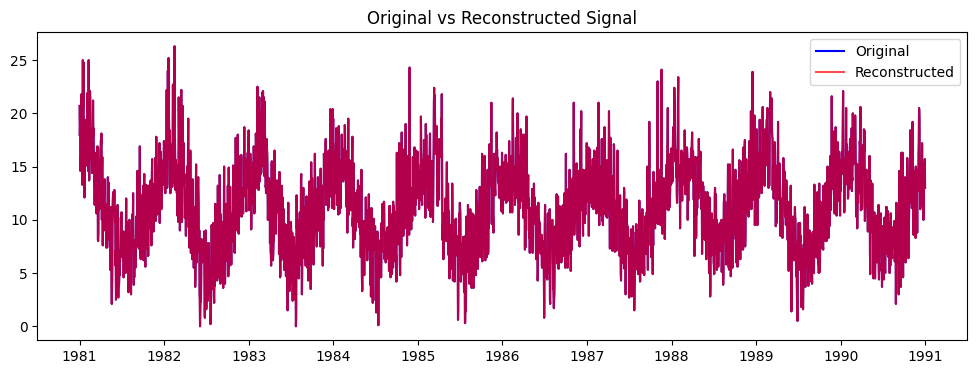

In [7]:
reconstructed = trend + seasonal + resid
plt.figure(figsize=(12,4))
plt.plot(df['Temp'], label='Original', color='blue')
plt.plot(reconstructed, label='Reconstructed', color='red', alpha=0.7)
plt.legend()
plt.title("Original vs Reconstructed Signal")
plt.show()

In [8]:
train = df.iloc[:-365]
test = df.iloc[-365:]

In [9]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(trend.dropna(), order=(1,1,1))
model_fit = model.fit()
trend_forecast = model_fit.forecast(steps=365)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
seasonal_forecast = seasonal[-365:].values

In [11]:
import numpy as np

forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=365, freq='D')

final_forecast = pd.Series(trend_forecast.values + seasonal_forecast, index=forecast_index)

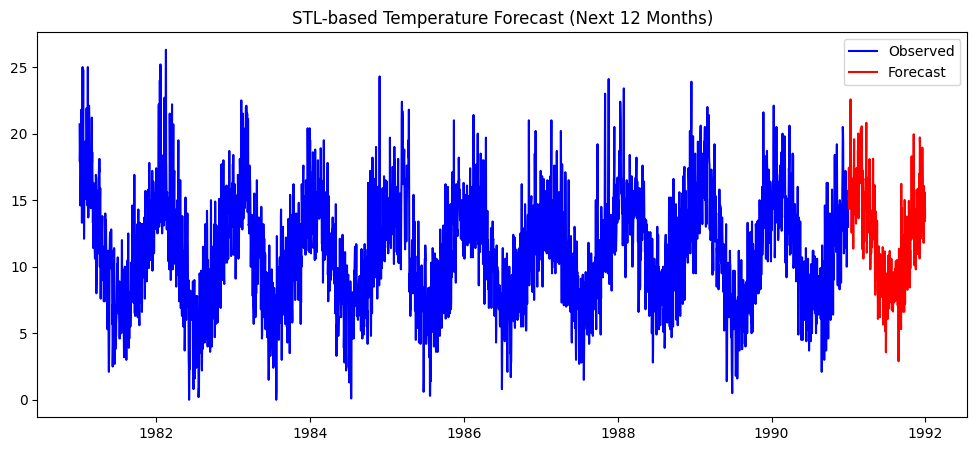

In [12]:
plt.figure(figsize=(12,5))
plt.plot(df['Temp'], label='Observed', color='blue')
plt.plot(final_forecast, label='Forecast', color='red')
plt.title("STL-based Temperature Forecast (Next 12 Months)")
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['Temp'][:len(final_forecast)]
y_pred = final_forecast[:len(y_true)]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 1.05
RMSE: 1.61
